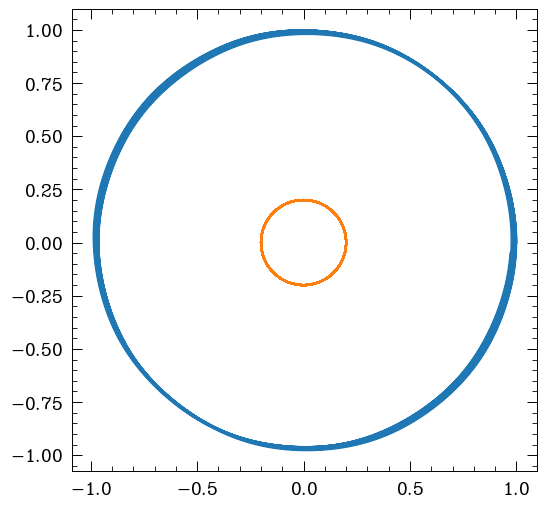

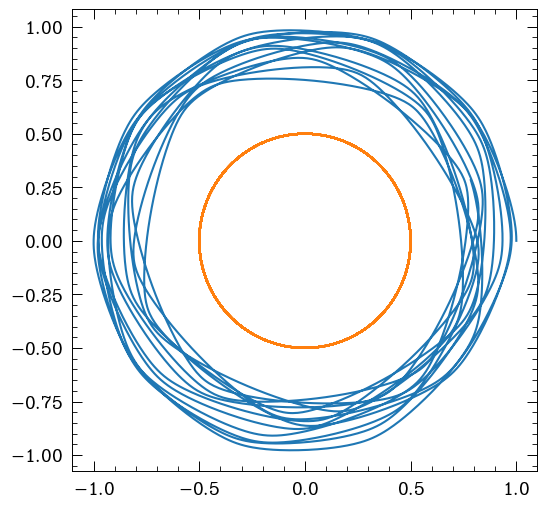

In [54]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp
import smplotlib
r = 0.2
omega = 2 * np.pi
def odes(t, arej):
    x, y, u, v = arej
    x1, y1 = r * np.cos(omega*t), r * np.sin(omega*t)
    x2, y2 = r * np.cos(omega*t + np.pi), r * np.sin(omega*t + np.pi)
    d1 = (x - x1) ** 2 + (y - y1)**2
    d2 = (x - x2) ** 2 + (y - y2)**2
    xpika = u
    ypika = v
    upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
    vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

    return [xpika, ypika, upika, vpika]
initial = [1, 0, 0, 1]
t_span = np.arange(0, 60, 0.01)
sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()], 
                    t_eval = t_span,
                    y0=initial, dense_output=True, 
                    rtol=1e-20, atol=1e-20)
plt.plot(sol.y[0, :], sol.y[1, :])
x1, y1 = r * np.cos(omega*t_span), r * np.sin(omega*t_span)
plt.plot(x1, y1)
plt.savefig("images/2-1-orbite_1.pdf")
plt.show()

r = 0.5
omega = 2 * np.pi
def odes(t, arej):
    x, y, u, v = arej
    x1, y1 = r * np.cos(omega*t), r * np.sin(omega*t)
    x2, y2 = r * np.cos(omega*t + np.pi), r * np.sin(omega*t + np.pi)
    d1 = (x - x1) ** 2 + (y - y1)**2
    d2 = (x - x2) ** 2 + (y - y2)**2
    xpika = u
    ypika = v
    upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
    vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

    return [xpika, ypika, upika, vpika]
initial = [1, 0, 0, 1]
t_span = np.arange(0, 60, 0.01)
sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()], 
                    t_eval = t_span,
                    y0=initial, dense_output=True, 
                    rtol=1e-20, atol=1e-20)
plt.plot(sol.y[0, :], sol.y[1, :])
x1, y1 = r * np.cos(omega*t_span), r * np.sin(omega*t_span)
plt.plot(x1, y1)
plt.savefig("images/2-1-orbite_2.pdf")
plt.show()

In [55]:
r = 0.2
omega = 2 * np.pi 
phi = np.pi * 0.5

initial = [1, 0, 0,  1]
t_span = np.arange(0, 20, 0.001)

sols = []
from tqdm import tqdm
for r in tqdm(np.linspace(0, 0.9, 30)):
    for phi in [0, np.pi * 0.5]:
        def odes(t, arej):
            x, y, u, v = arej
            x1, y1 = r * np.cos(omega*t + phi), r * np.sin(omega*t + phi)
            x2, y2 = r * np.cos(omega*t + phi + np.pi), r * np.sin(omega*t + phi + np.pi)
            d1 = (x - x1) ** 2 + (y - y1)**2
            d2 = (x - x2) ** 2 + (y - y2)**2
            xpika = u
            ypika = v
            upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
            vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

            return [xpika, ypika, upika, vpika]
        
        sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()], 
                            t_eval = t_span,
                            y0=initial, dense_output=True, 
                            rtol=1e-20, atol=1e-20)
        sol.r = r
        sol.phi = phi
        ds = (sol.y[0, :]**2 + sol.y[1,:]**2)**0.5
        sol.ds = ds
        sols.append(sol)

100%|██████████| 30/30 [02:48<00:00,  5.61s/it]


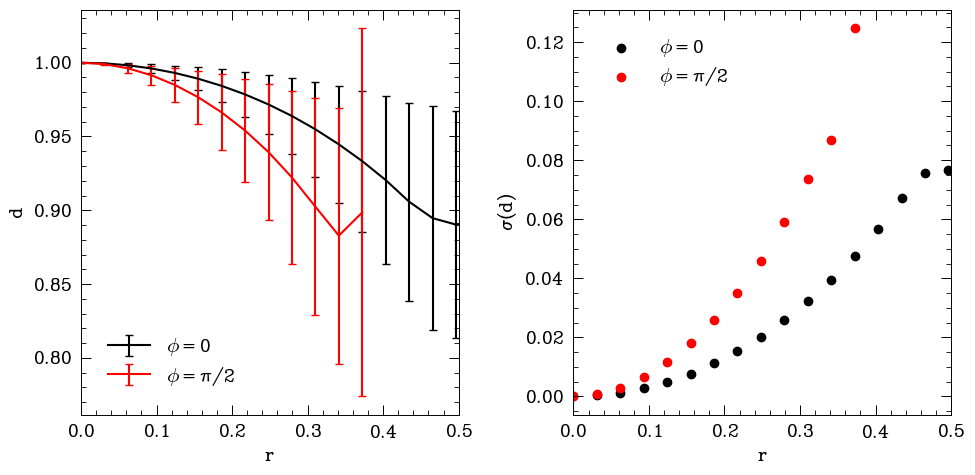

In [56]:
df = pd.DataFrame(data=dict(
    r = [sol.r for sol in sols],
    phi = ["0" if sol.phi == 0 else f"0.5 pi" for sol in sols],
    d_mean = [np.mean(sol.ds) for sol in sols],
    d_std=[np.std(sol.ds) for sol in sols]
))
df = df[df.d_mean < 1.6]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


subset = df[df.phi=="0"]
axes[0].errorbar(subset.r, subset.d_mean, yerr=subset.d_std, color="k", label="$\phi=0$")
axes[0].set_ylabel("$d$")
axes[0].set_xlabel("$r$")
axes[1].scatter(subset.r, subset.d_std, color="k", label="$\phi=0$")
axes[1].set_xlabel("$r$")
axes[1].set_ylabel("$\sigma(d)$")

subset = df[df.phi!="0"]
axes[0].errorbar(subset.r, subset.d_mean, yerr=subset.d_std, color="r", label="$\phi=\pi/2$")
axes[0].set_ylabel("$d$")
axes[0].set_xlabel("$r$")
axes[1].scatter(subset.r, subset.d_std, color="r", label="$\phi=\pi/2$")
axes[1].set_xlabel("$r$")
axes[1].set_ylabel("$\sigma(d)$")
axes[0].legend()
axes[1].legend()


axes[0].set_xlim((0, 0.5))
axes[1].set_xlim((0, 0.5))
# axes[0].set_ylim((0, 2))
# axes[1].set_ylim((None, 1))
fig.tight_layout()

fig.savefig("images/2-2-vplivr.pdf")
fig.show()